# Reddit Research: Taoism 

## Exploratory Data Analysis

In [2]:
import pandas as pd

# Load the comments CSV file
comments_df = pd.read_csv("../data/taoism_comments.csv")

# Show the first few rows
comments_df.head()

,post_id,comment_id,parent_id,author,body,score,created_utc,depth
0,1kn2via,msf3jdu,t3_1kn2via,whatthebosh,Everything is as it is. If you feel moved to h...,32,1.747300e+09,0
1,1kn2via,msez1as,t3_1kn2via,ZipMonk,It's not about good and evil those are Abraham...,26,1.747297e+09,0
2,1kn2via,msezcku,t3_1kn2via,Yous1ash,Buddhism is much more equipped to deal with su...,25,1.747297e+09,0
3,1kn2via,msf2ald,t3_1kn2via,jacques-vache-23,Why do you walk by? The moment was there and ...,20,1.747299e+09,0
4,1kn2via,msfl533,t3_1kn2via,yellowlotusx,"Today, i went to the spots where hobos and add...",7,1.747309e+09,0


In [4]:
# Basic info about the dataframe
comments_df.info()

# Check for null or missing values
comments_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2010 entries, 0 to 2009
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   post_id      2010 non-null   object 
 1   comment_id   2010 non-null   object 
 2   parent_id    2010 non-null   object 
 3   author       2010 non-null   object 
 4   body         2010 non-null   object 
 5   score        2010 non-null   int64  
 6   created_utc  2010 non-null   float64
 7   depth        2010 non-null   int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 125.8+ KB


post_id        0
comment_id     0
parent_id      0
author         0
body           0
score          0
created_utc    0
depth          0
dtype: int64

In [6]:
# Quick summary statistics for numerical columns
comments_df.describe()

,score,created_utc,depth
count,2010.000000,2.010000e+03,2010.000000
mean,3.146766,1.746435e+09,1.790547
std,6.724905,5.215170e+05,2.207596
min,-25.000000,1.745425e+09,0.000000
25%,1.000000,1.746008e+09,0.000000
50%,2.000000,1.746374e+09,1.000000
75%,3.000000,1.746849e+09,3.000000
max,163.000000,1.747328e+09,9.000000


The column 'created_utc' is a bit unclear, so we could convert it to datetime so it is more legible.

In [9]:
comments_df['timestamp'] = pd.to_datetime(comments_df['created_utc'], unit='s')

In [13]:
comments_df.describe()

,score,created_utc,depth,timestamp
count,2010.000000,2.010000e+03,2010.000000,2010
mean,3.146766,1.746435e+09,1.790547,2025-05-05 08:55:01.577612032
min,-25.000000,1.745425e+09,0.000000,2025-04-23 16:18:19
25%,1.000000,1.746008e+09,0.000000,2025-04-30 10:05:27
50%,2.000000,1.746374e+09,1.000000,2025-05-04 16:01:01
75%,3.000000,1.746849e+09,3.000000,2025-05-10 03:50:45.500000
max,163.000000,1.747328e+09,9.000000,2025-05-15 16:57:34
std,6.724905,5.215170e+05,2.207596,NaN


We can also view the top-scoring and most controversial comments, which are those that have received the most and the least scoring from other users, respectively.

top_comments = comments_df.sort_values(by='score', ascending=False).head(10)
top_comments[['score', 'author', 'depth', 'body']].style.set_properties(subset=['body'], **{'white-space': 'pre-wrap'})

In [18]:
controversial_comments = comments_df.sort_values(by='score').head(10)
controversial_comments[['score', 'author', 'depth', 'body']].style.set_properties(subset=['body'], **{'white-space': 'pre-wrap'})

,score,author,depth,body
1739,-25,Instrume,1,"By the same logic, you don't need the DDJ either. You can simply experience Dao and put away the dusty old pamphlet which in itself asserts that it does not contain Unchanging wisdom."
1821,-13,Spiritual_List_979,5,"taoism is not riding a wave. Taoism is about alignment with the mandate of heaven. riding a wave is not comparable to Taoism. Taoism requires thought and effort, called cultivation by taoists."
1850,-13,Spiritual_List_979,7,what you have said is blatantly false. a wave does not have a mandate. a wave cannot attain immortality.
1869,-11,Spiritual_List_979,9,you're literally using the instructions from divine beings for your entertainment. that is beyond foolishness. that is insanity.
1784,-9,Spiritual_List_979,3,"surfing is literally riding a wave. fish do it for excitement. you cant compare Taoism to such a simple feat. ttc mentions yin and yang. this is more than 1000 years older than the tao te ching. you definitely need premodern chinese thought to understand taoism. otherwise you end up with ""yang is penis and yin is vagina""."
1051,-7,Spiritual_List_979,2,in Taoism heaven is yang earth is yin they are opposites. this is really not stuff for thinking about. it is stuff that is there.
1741,-6,Instrume,1,"What's wrong with inventing the universe before baking an apple pie? The DDJ indicates its intrinsic contradiction in its opening line: ""The Dao that can be Daoed is not the eternal Dao. The Name that can be Named is not the Eternal Name."" The DDJ is a named work consisting of names that people are trying to Dao. The DDJ as a form of contradiction ends up indicating it in itself is not sufficient, which means you go for Zhuangzi and Liezi as a starter, then start looking for the broader context for broader answers. The DDJ can be seen as posing an ultimate, possibly the ultimate, question, but the answers aren't inside the book. Being a Daoist means accepting the question and seeking the (unreachable) answer, including in adjacent works."
1041,-5,Appropriate_Cut_3536,1,"Oooo, this answer is bold. I love the courage to embrace yin aspects, which have been stigmatized in women. Holding yang qualities alongside these would go far to balance a very powerful embodiment of female leadership."
918,-4,Competitive_Bug3664,1,"I agree. But what I mean is that if we try to find pure Buddhist society with the least outer influence , then we do have examples of south East Asia and Sri Lanka. But do we have the same example for daoism ?"
1788,-4,Instrume,3,"The problem is that ""pure"" Daoism is dead; i.e, Daoism in China became Neo-Daoism (Xuanxue) around 300 AD, then split into religious Daoism and the philosophical wing, which was picked up and absorbed by Neo-Confucians and Buddhism. Trying to place Daoism as a pure, ideal case is easy because there's very few texts given its relatively quick demise as a pure philosophy, and short texts at that. But trying to deal with Daoism seriously, you end up going through Neo-Confucians and Ch'an Buddhism because that's the afterlife of Daoism, and the people who, albeit in an impure form, actually practice it."


We can already see some interesting characteristics from both the top-scoring and the most controversial comments, but we will reserve the interpretations for a later phase.

Another thing we can do is try to see how the comments are distributed, and explore how deep are the discussions in average.

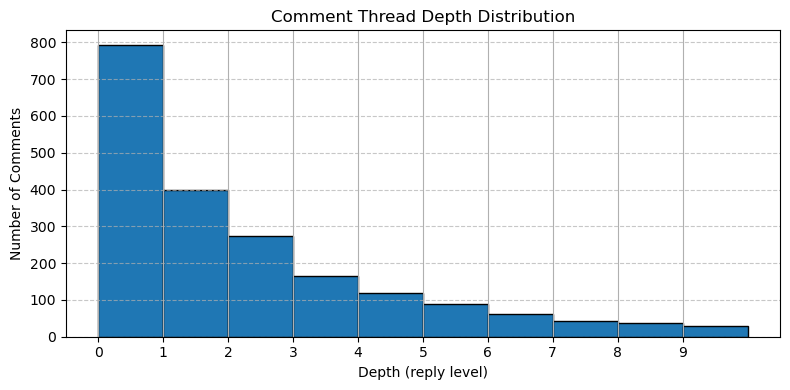

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
comments_df['depth'].hist(bins=range(0, comments_df['depth'].max() + 2), edgecolor='black')
plt.title("Comment Thread Depth Distribution")
plt.xlabel("Depth (reply level)")
plt.ylabel("Number of Comments")
plt.xticks(range(0, comments_df['depth'].max() + 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

We can also explore the average lenght of the comments, by counting the words of each comment and visualizing it.

In [29]:
comments_df['word_count'] = comments_df['body'].str.split().str.len()

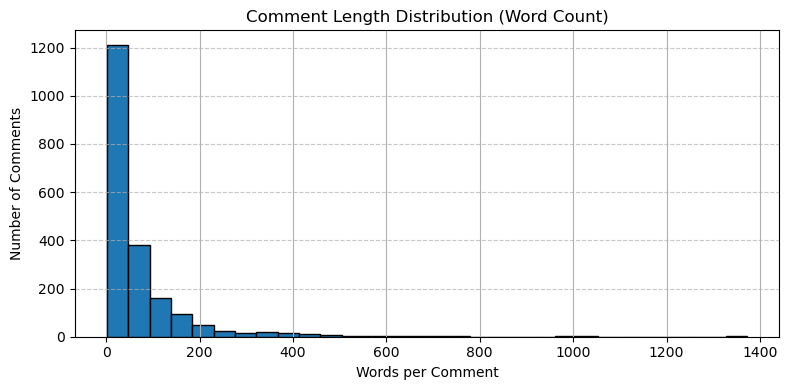

In [31]:
plt.figure(figsize=(8, 4))
comments_df['word_count'].hist(bins=30, edgecolor='black')
plt.title("Comment Length Distribution (Word Count)")
plt.xlabel("Words per Comment")
plt.ylabel("Number of Comments")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

One of the things that this tells us is that most comments are rather short, and only a few have considerable length. This is not surprising if we observe the list of top-scored comments, where we can see that the two most voted are not longer than two sentences. But this also makes it a bit harder to analyze, because perhaps in a different kind of forum, one would expect that the longer the message, the deeper the argument or reasoning of the author. In a forum such as r/Taoism, this is not neccesary the case, and the users frequenting the channel might actually feel more affinity to short, aphorism-like comments, which helps them reach an insight without the need of being overly verbose.

In [55]:
# Aphoristic comments (short but highly upvoted)
aphorisms = comments_df[
    (comments_df['word_count'] <= 30) &
    (comments_df['score'] >= 5)
].sort_values(by='score', ascending=False)

# Long reflective comments (good for discourse analysis)
longform = comments_df[
    (comments_df['word_count'] > 50) &
    (comments_df['score'] >= 2)
].sort_values(by='score', ascending=False)

In [65]:
aphorisms[['score', 'word_count', 'author', 'body']].head(10).style.set_properties(subset=['body'], **{'white-space': 'pre-wrap'})

,score,word_count,author,body
1364,163,21,Quentin__Tarantulino,What to do before enlightenment? Carry water and chop wood. And what to do when enlightened? Carry water and chop wood.
466,94,6,infraspace,The map is not the land.
1704,79,29,Lao_Tzoo,"This is similar to saying, no one knows how to surf well unless they've read all the history of surfing, when all they really need to do is surf."
467,75,14,Tao1976,Focusing on what to call the Tao takes away from just experiencing the Tao.
468,41,10,jzatopa,The All cannot be represented in totality with a name.
469,36,18,OnesimusUnbound,"When you think you know what the Tao is, realize you've not fully grasped what the Tao is."
1,26,10,ZipMonk,It's not about good and evil those are Abrahamic concepts.
472,25,7,SykonotticGuy,Language is binary. The tao is not.
38,25,8,Top_Necessary4161,walk by and write about it on reddit
1452,23,29,TangAlienMonkeyGod,"Hey, even if your mind isn't moving as effortlessly as you would like, at least you're seeing the effortlessness everywhere around you, seems like you're on the right track"


In [67]:
longform[['score', 'word_count', 'author', 'body']].head(10).style.set_properties(subset=['body'], **{'white-space': 'pre-wrap'})

,score,word_count,author,body
731,79,369,Lao_Tzoo,"As an agreement and confirmation, here is a type of meditation I've recommended for perhaps 20 years or so, and on Reddit many times in the past 5 years or so: ""As with many things in life there are many methods. Different ones work better for different people according to their personality, inclinations, and natural talents. My favorite is a variation of counting breaths. I don't like counting breaths because it involves discursive thought, that is, concentrating with words and we want to transcend words, and it also involves meeting a goal, that is, counting. People then worry about counting and losing count and wandering mind while counting etc. Then they waste energy worrying about whether they are doing it correctly or not. What I have come up with is what I call rhythmic breathing. Sit comfortably, or lay down. Comfort is the goal. You will inhale and exhale through the nose. Inhale deeply using abdominal breathing or yogic complete breathing. It doesn't matter which, as long as you can breath deeply. Inhale deeply to your comfort level. Hold the breath to your comfort level. Exhale to your comfort level. Hold the exhalation to your comfort level. Then inhale again and continue. This forms a natural rhythm of your own. There is no set time or rhythm. It is entirely up to you. Each breath/hold cycle will vary from one cycle to the other. That is okay. It doesn't matter. It's your rhythm. The only goal is to not consciously set a goal/pattern and be comfortable. If you need an extra deep breath, take it. If it is comfortable to hold longer this time than last time, fine. Think of each breath cycle as similar to waves on the beach. Inhale wave comes in, pause, exhale wave goes out, pause, etc. Sometimes I'll even visualize waves on the beach. The waves at the beach have their own rhythm, but it is a variable rhythm. It is rhythmic, but always changing, just like your breath. You will find your breathing sounds like waves at the beach as well. As you exhale feel the mental tension go out with the waves. Then just relax, feel and enjoy your own natural rhythm."""
416,54,69,Revolutionary_Gap150,"Taoism isn't a line to be crossed, it's not a puzzle to be solved, or a lesson to be learned. The Tao is a flowing stream some people choose to walk in while living their life. The study of the Tao is the point. Any explanation or believed understanding is inherently flawed. Even this writing is a failure. The Tao is a way. Some believe it is the way."
470,51,73,EncryptedMystic,"Imagine trying to hold the ocean in your hands, the moment you grasp it, it’s no longer the ocean, just a handful of water. The Tao is like that: the deeper truth slips through the cracks of language. Before words, before thought, there was the unnamed, the infinite womb of existence. Then, from that stillness, the universe breathed itself into being: stars, stones, you, me. Naming things gave them shape, but also limits."
199,46,61,platoniccavemen,"If you find a random seed and plant it in the ground, can you make sure it's an apple tree? Plant the seed and tend to it with care. It will grow into what it is, and you will have done your part. You can't raise safe, kind, and grateful children, but you can raise children with safety, kindness, and gratitude."
373,40,296,ryokan1973,"The only time in the Zhuangzi where a waterfall incident occurs is in the following story from Chapter 19:- >**""Confucius was seeing the sights at Lüliang, where the water falls from a height of thirty fathoms and races and boils along for forty li, so swift that no fish or other water creature can swim in it. He saw a man dive into the water, and supposing that the man was in some kind of trouble and intended to end his life, he ordered his disciples to line up on the bank and pull the man out. But after the man had gone a couple of hundred paces, he came out of the water and began strolling along the base of the embankment, his hai